In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MultiConditionalDynamic import *

In [2]:
# 系统参数

m = 1.
c = 0.5
g = 9.8
k = 10.
h = 5.
eta = 0.8

### 阶段 1 建模

In [3]:
# 动力学方程 1

def dynamic1(t, x):
    return np.array([x[1], -c*x[1]/m-g])

# 边界函数 11

def event11(t, x):
    return x[0] - h

# 突变函数 1

def trans11(t, x):
    return np.array([x[0], -eta*x[1]])

# 边界函数 12

def event12(t, x):
    return -x[0]

# 突变函数 12

def trans12(t, x):
    return x

MCDynamic1 = MultiConditionalDynamic(dynamic1, [event11, event12], [trans11, trans12])

### 阶段 2 建模 

In [4]:
# 动力学方程 2

def dynamic2(t, x):
    return np.array([x[1], -k*x[0]/m-c*x[1]/m-g])

# 边界函数 21

def event21(t, x):
    return x[0]

# 突变函数 21

def trans21(t, x):
    return x

MCDynamic2 = MultiConditionalDynamic(dynamic2, [event21], [trans21])

### 拓扑关系

In [5]:
MCDynamic1.nxts = [MCDynamic1, MCDynamic2]
MCDynamic2.nxts = [MCDynamic1]

### 仿真运行

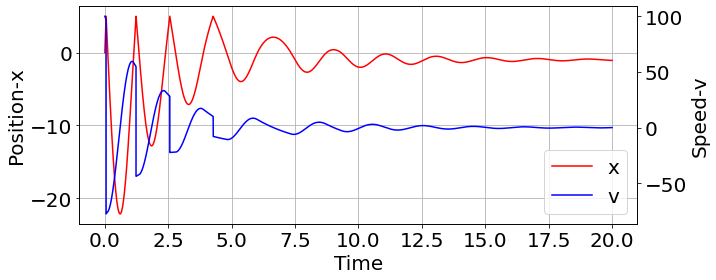

In [6]:
# 初值设置

x0 = np.array([0, 100])

# 时间区间设定

t_span = [0, 20]

# 采样频率设定

t_density = 1000

# 运行

res = MCDynamic1.run(x0, t_span, t_density)

# 绘图

fig = plt.figure(figsize = (10, 4))
ax = fig.add_subplot(111)
l1 = ax.plot(res[0], res[1][0, :], "r-", label = "x")
ax2 = ax.twinx()
l2 = ax2.plot(res[0], res[1][1, :], "b-", label = "v")
ls = l1 + l2
lbs = [l.get_label() for l in ls]
ax.legend(ls, lbs, fontsize = 20)
ax.set_xlabel("Time", fontsize = 20)
ax.set_ylabel("Position-x", fontsize = 20)
ax2.set_ylabel("Speed-v", fontsize = 20)
ax.tick_params(labelsize = 20)
ax2.tick_params(labelsize = 20)
ax.grid()
plt.show()